In [54]:
import os
from collections import defaultdict
from IPython.display import display
import pandas as pd


In [55]:
image_exts = ('.png', '.jpg', '.jpeg', '.JPG', '.JPEG', '.Jpeg')

The datasets are already well maintained and seperated into different folders based on the shape, label and also divided for training and testing.

If we want we can change that, and use custom train test splitting for our purpose.

# DATASET 1

### This dataset is a combination of Spiral and Wave shapes.

In [56]:
root_dir_d1 = "../data/raw/dataset_1"
counts_d1 = defaultdict(lambda: {'healthy': 0, 'parkinson': 0})

for shape in os.listdir(root_dir_d1):
    shape_path = os.path.join(root_dir_d1, shape)
    if not os.path.isdir(shape_path):
        continue
    for split in ['training', 'testing']:
        split_path = os.path.join(shape_path, split)
        if not os.path.isdir(split_path):
            continue
        for label in ['healthy', 'parkinson']:
            label_path = os.path.join(split_path, label)
            if not os.path.isdir(label_path):
                continue
            num_images = len([f for f in os.listdir(label_path) if f.endswith(image_exts)])
            counts_d1[shape][label] += num_images

# Convert to DataFrame for a nice display
df_d1 = pd.DataFrame.from_dict(counts_d1, orient='index')
df_d1 = df_d1.reset_index().rename(columns={'index': 'Shape', 'healthy': 'Healthy', 'parkinson': 'Parkinson'})
df_d1['Total'] = df_d1['Healthy'] + df_d1['Parkinson']

display(df_d1)

# Optionally, print the total row
total_healthy = df_d1['Healthy'].sum()
total_parkinson = df_d1['Parkinson'].sum()
print(f"Total: Healthy = {total_healthy}, Parkinson = {total_parkinson}")

,Shape,Healthy,Parkinson,Total
0,spiral,51,51,102
1,sw,102,102,204
2,wave,51,51,102


Total: Healthy = 204, Parkinson = 204


# DATASET 2

### This dataset is a combination of Cube, Spiral and Triangle shapes.

In [57]:
root_dir_d2 = "../data/raw/dataset_2"
counts_d2 = defaultdict(lambda: {'healthy': 0, 'parkinson': 0})

for shape in os.listdir(root_dir_d2):
    shape_path = os.path.join(root_dir_d2, shape)
    if not os.path.isdir(shape_path):
        continue
    for split in ['training', 'testing']:
        split_path = os.path.join(shape_path, split)
        if not os.path.isdir(split_path):
            continue
        for label in ['healthy', 'parkinson']:
            label_path = os.path.join(split_path, label)
            if not os.path.isdir(label_path):
                continue
            num_images = len([f for f in os.listdir(label_path) if f.endswith(image_exts)])
            counts_d2[shape][label] += num_images

# Convert to DataFrame for a nice display
df_d2 = pd.DataFrame.from_dict(counts_d2, orient='index')
df_d2 = df_d2.reset_index().rename(columns={'index': 'Shape', 'healthy': 'Healthy', 'parkinson': 'Parkinson'})
df_d2['Total'] = df_d2['Healthy'] + df_d2['Parkinson']

display(df_d2)

# Optionally, print the total row
total_healthy = df_d2['Healthy'].sum()
total_parkinson = df_d2['Parkinson'].sum()
print(f"Total: Healthy = {total_healthy}, Parkinson = {total_parkinson}")

,Shape,Healthy,Parkinson,Total
0,cst,72,174,246
1,cube,24,54,78
2,spiral,24,60,84
3,triangle,24,60,84


Total: Healthy = 144, Parkinson = 348


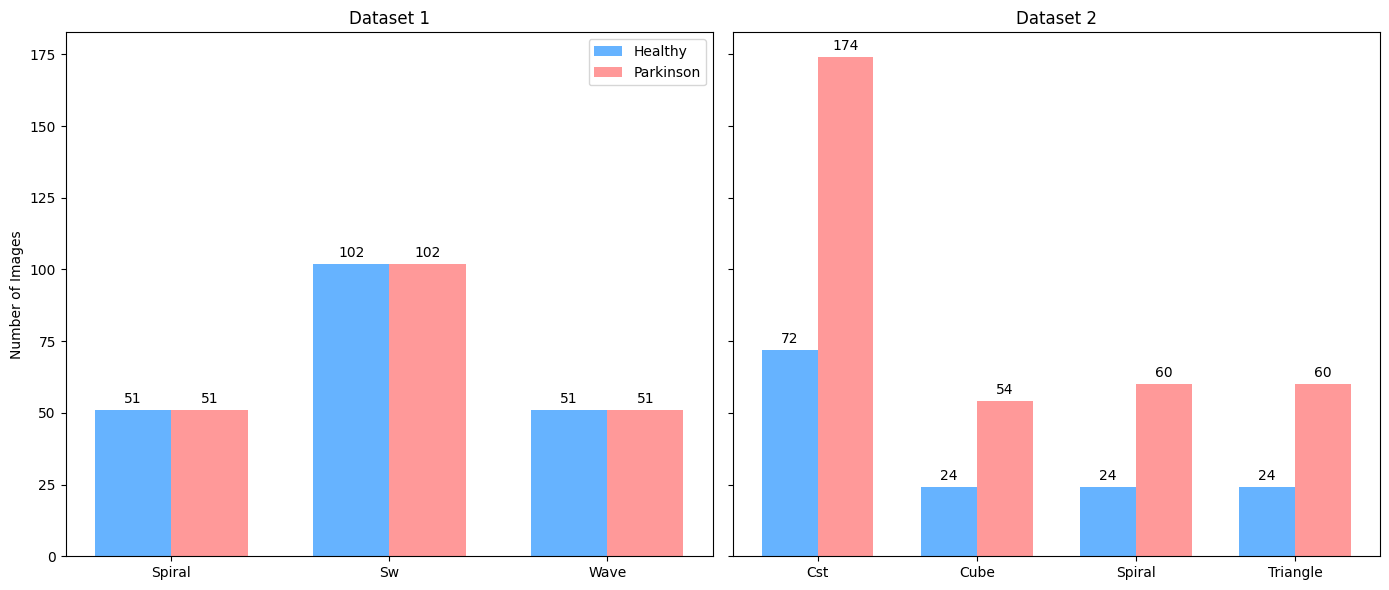

In [58]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Dataset 1
counts = counts_d1
shapes = list(counts.keys())
healthy_counts = [counts[shape]['healthy'] for shape in shapes]
parkinson_counts = [counts[shape]['parkinson'] for shape in shapes]
x = np.arange(len(shapes))
width = 0.35

ax = axes[0]
rects1 = ax.bar(x - width/2, healthy_counts, width, label='Healthy', color='#66b3ff')
rects2 = ax.bar(x + width/2, parkinson_counts, width, label='Parkinson', color='#ff9999')
ax.set_ylabel('Number of Images')
ax.set_title('Dataset 1')
ax.set_xticks(x)
ax.set_xticklabels([shape.capitalize() for shape in shapes])
ax.legend()
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Plot for Dataset 2
counts = counts_d2
shapes = list(counts.keys())
healthy_counts = [counts[shape]['healthy'] for shape in shapes]
parkinson_counts = [counts[shape]['parkinson'] for shape in shapes]
x = np.arange(len(shapes))

ax = axes[1]
rects1 = ax.bar(x - width/2, healthy_counts, width, label='Healthy', color='#66b3ff')
rects2 = ax.bar(x + width/2, parkinson_counts, width, label='Parkinson', color='#ff9999')
ax.set_title('Dataset 2')
ax.set_xticks(x)
ax.set_xticklabels([shape.capitalize() for shape in shapes])
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### The dataset size is small and also uneven in case of the 2nd dataset, so we are going to opt to use data augmentation to create some more images, by utilizing rotation, random noise, horizontal flipping.

# AFTER AUGMENTATION

In [59]:
proc_dir_d1 = "../data/processed/dataset_1"
counts_d1_aug = defaultdict(lambda: {'healthy': 0, 'parkinson': 0})

for shape in os.listdir(proc_dir_d1):
    shape_path = os.path.join(proc_dir_d1, shape)
    if not os.path.isdir(shape_path):
        continue
    for split in ['training', 'testing']:
        split_path = os.path.join(shape_path, split)
        if not os.path.isdir(split_path):
            continue
        for label in ['healthy', 'parkinson']:
            label_path = os.path.join(split_path, label)
            if not os.path.isdir(label_path):
                continue
            num_images = len([f for f in os.listdir(label_path) if f.endswith(image_exts)])
            counts_d1_aug[shape][label] += num_images

# Convert to DataFrame for a nice display
df_d1_aug = pd.DataFrame.from_dict(counts_d1_aug, orient='index')
df_d1_aug = df_d1_aug.reset_index().rename(columns={'index': 'Shape', 'healthy': 'Healthy', 'parkinson': 'Parkinson'})
df_d1_aug['Total'] = df_d1_aug['Healthy'] + df_d1_aug['Parkinson']

display(df_d1_aug)

# Optionally, print the total row
total_healthy = df_d1_aug['Healthy'].sum()
total_parkinson = df_d1_aug['Parkinson'].sum()
print(f"Total: Healthy = {total_healthy}, Parkinson = {total_parkinson}")

,Shape,Healthy,Parkinson,Total
0,spiral,204,204,408
1,sw,408,408,816
2,wave,204,204,408


Total: Healthy = 816, Parkinson = 816


In [60]:
proc_dir_d2 = "../data/processed/dataset_2"
counts_d2_aug = defaultdict(lambda: {'healthy': 0, 'parkinson': 0})

for shape in os.listdir(proc_dir_d2):
    shape_path = os.path.join(proc_dir_d2, shape)
    if not os.path.isdir(shape_path):
        continue
    for split in ['training', 'testing']:
        split_path = os.path.join(shape_path, split)
        if not os.path.isdir(split_path):
            continue
        for label in ['healthy', 'parkinson']:
            label_path = os.path.join(split_path, label)
            if not os.path.isdir(label_path):
                continue
            num_images = len([f for f in os.listdir(label_path) if f.endswith(image_exts)])
            counts_d2_aug[shape][label] += num_images

# Convert to DataFrame for a nice display
df_d2_aug = pd.DataFrame.from_dict(counts_d2_aug, orient='index')
df_d2_aug = df_d2_aug.reset_index().rename(columns={'index': 'Shape', 'healthy': 'Healthy', 'parkinson': 'Parkinson'})
df_d2_aug['Total'] = df_d2_aug['Healthy'] + df_d2_aug['Parkinson']

display(df_d2_aug)

# Optionally, print the total row
total_healthy = df_d2_aug['Healthy'].sum()
total_parkinson = df_d2_aug['Parkinson'].sum()
print(f"Total: Healthy = {total_healthy}, Parkinson = {total_parkinson}")

,Shape,Healthy,Parkinson,Total
0,cst,288,696,984
1,cube,96,216,312
2,spiral,96,240,336
3,triangle,96,240,336


Total: Healthy = 576, Parkinson = 1392


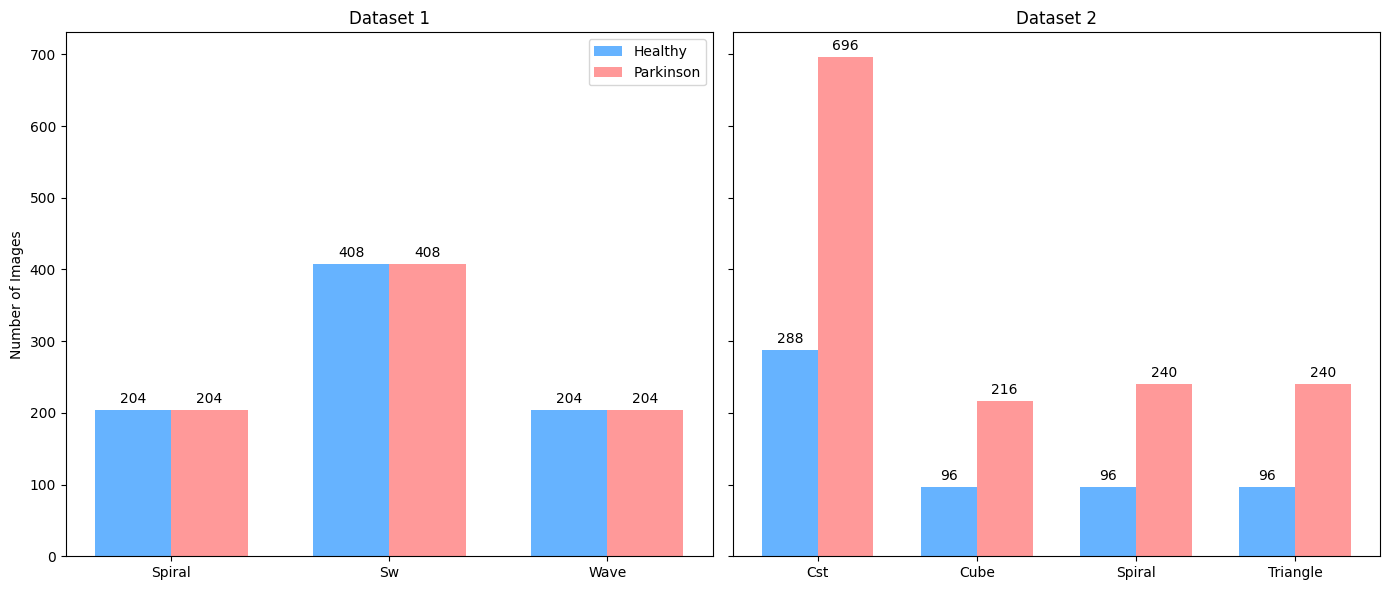

In [61]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Dataset 1
counts = counts_d1_aug
shapes = list(counts.keys())
healthy_counts = [counts[shape]['healthy'] for shape in shapes]
parkinson_counts = [counts[shape]['parkinson'] for shape in shapes]
x = np.arange(len(shapes))
width = 0.35

ax = axes[0]
rects1 = ax.bar(x - width/2, healthy_counts, width, label='Healthy', color='#66b3ff')
rects2 = ax.bar(x + width/2, parkinson_counts, width, label='Parkinson', color='#ff9999')
ax.set_ylabel('Number of Images')
ax.set_title('Dataset 1')
ax.set_xticks(x)
ax.set_xticklabels([shape.capitalize() for shape in shapes])
ax.legend()
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Plot for Dataset 2
counts = counts_d2_aug
shapes = list(counts.keys())
healthy_counts = [counts[shape]['healthy'] for shape in shapes]
parkinson_counts = [counts[shape]['parkinson'] for shape in shapes]
x = np.arange(len(shapes))

ax = axes[1]
rects1 = ax.bar(x - width/2, healthy_counts, width, label='Healthy', color='#66b3ff')
rects2 = ax.bar(x + width/2, parkinson_counts, width, label='Parkinson', color='#ff9999')
ax.set_title('Dataset 2')
ax.set_xticks(x)
ax.set_xticklabels([shape.capitalize() for shape in shapes])
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()